In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv("carprices.csv")
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

<function matplotlib.pyplot.show(close=None, block=None)>

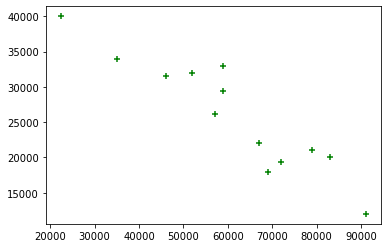

In [22]:
plt.scatter(df['Mileage'], df['Sell Price($)'], marker='+', c='green')
plt.show

In [6]:
dummy = pd.get_dummies(df['Car Model'])

In [7]:
dummy

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [10]:
full = pd.concat([df,dummy], axis = 'columns')

In [11]:
full

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [20]:
req = full.drop(['Car Model', 'Mercedez Benz C class'], axis = 'columns')
req

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


In [24]:
X = req.drop(['Sell Price($)'], axis = 1)
X

,Mileage,Age(yrs),Audi A5,BMW X5
0,69000,6,0,1
1,35000,3,0,1
2,57000,5,0,1
3,22500,2,0,1
4,46000,4,0,1
5,59000,5,1,0
6,52000,5,1,0
7,72000,6,1,0
8,91000,8,1,0
9,67000,6,0,0


In [25]:
y = req['Sell Price($)']
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [26]:
from sklearn.linear_model import LinearRegression
ref = LinearRegression()

In [27]:
ref.fit(X,y)

LinearRegression()

In [29]:
ref.predict([[45000, 4, 0, 0]])

array([36991.31721061])

In [33]:
ref.predict([[86000, 7, 0, 1]])

array([11080.74313219])

In [32]:
ref.score(X,y)

0.9417050937281083